In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ,Reshape,BatchNormalization,LeakyReLU
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#Load and Visualize the Dataset

In [5]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


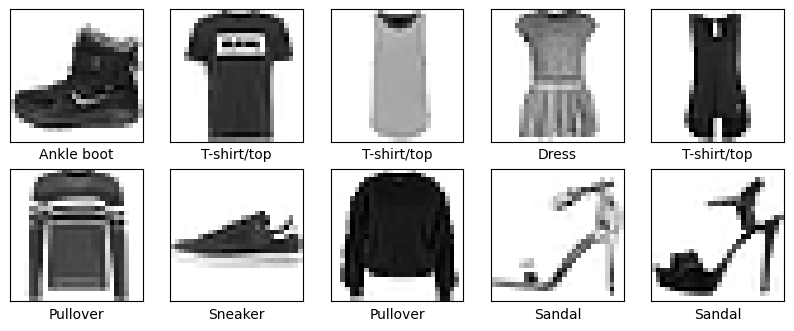

In [6]:
# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some examples from the dataset
def plot_examples(images, labels, class_names, num_examples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_examples):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

plot_examples(train_images, train_labels, class_names)


#Data Preprocessing


In [7]:
# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to include the channel dimension
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


#Data Distribution

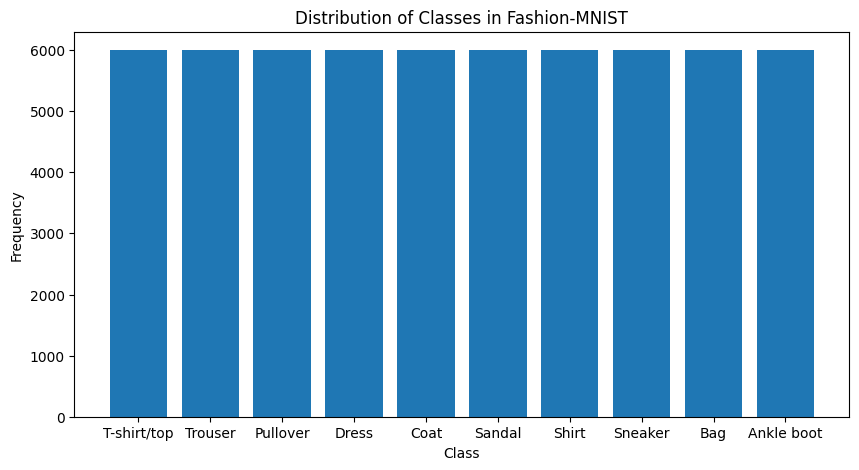

In [8]:
def plot_label_distribution(labels, class_names):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(10, 5))
    plt.bar(class_names, counts)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Distribution of Classes in Fashion-MNIST')
    plt.show()

# Original labels before one-hot encoding for distribution visualization
train_labels_original = np.argmax(train_labels, axis=1)
test_labels_original = np.argmax(test_labels, axis=1)

plot_label_distribution(train_labels_original, class_names)


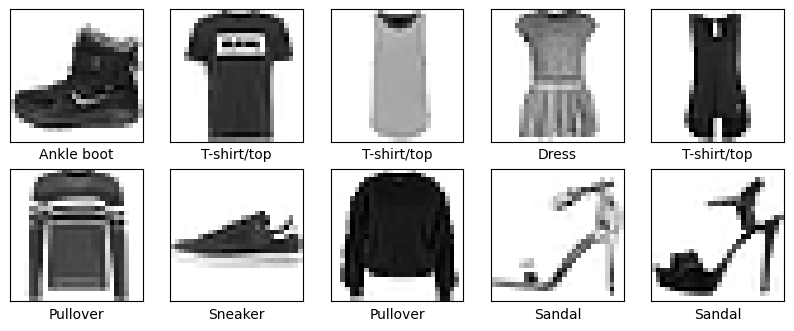

In [9]:
# Plot some preprocessed examples from the dataset
def plot_preprocessed_examples(images, labels, class_names, num_examples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_examples):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(class_names[np.argmax(labels[i])])
    plt.show()

plot_preprocessed_examples(train_images, train_labels, class_names)


#Build a Baseline CNN Model

In [10]:
# Build the baseline CNN model
def build_baseline_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

model = build_baseline_model()


#Compile and Train the Model

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=32,
                    validation_split=0.2)


Epoch 1/20
1500/1500 [==============================] - 16s 6ms/step - loss: 0.5881 - accuracy: 0.7892 - val_loss: 0.3809 - val_accuracy: 0.8546
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3914 - accuracy: 0.8592 - val_loss: 0.3350 - val_accuracy: 0.8731
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3412 - accuracy: 0.8784 - val_loss: 0.2917 - val_accuracy: 0.8928
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3075 - accuracy: 0.8875 - val_loss: 0.2727 - val_accuracy: 0.8968
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2853 - accuracy: 0.8953 - val_loss: 0.2599 - val_accuracy: 0.9036
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2636 - accuracy: 0.9046 - val_loss: 0.2511 - val_accuracy: 0.9067
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2480 - accuracy: 0.9089 - val_loss: 0.2574 - val_accuracy

 # Evaluate the Model's Performance

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Predict the labels for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

# Convert accuracy to percentage
test_acc_percentage = test_acc * 100
print(f'Test accuracy: {test_acc_percentage:.2f}%')
print(report)


313/313 [==============================] - 1s 2ms/step
Test accuracy: 90.87%
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.84      0.85      1000
       Dress       0.93      0.90      0.91      1000
        Coat       0.81      0.91      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.71      0.73      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#Train a GAN to Generate Synthetic Fashion-MNIST Images


1.   Generate
2.   Train The GAN



##1.Generate

In [13]:
#1.Generate
# Define the Generator
def build_generator():
    model = Sequential([
        Dense(256, input_dim=100),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(1024),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(28*28*1, activation='tanh'),
        Reshape((28, 28, 1))
    ])
    return model

# Define the Discriminator
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define the GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    return model

# Build and compile the Discriminator
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build the Generator
generator = build_generator()

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')


##2.Train The GAN

In [14]:
# 2.Train The GAN
def train_gan(epochs, batch_size, save_interval):
    # Load Fashion-MNIST dataset
    (train_images, _), (_, _) = fashion_mnist.load_data()
    train_images = (train_images / 255.0 - 0.5)  # Normalize to [-0.5, 0.5]
    train_images = np.expand_dims(train_images, axis=-1)

    # Training loop
    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, train_images.shape[0], batch_size)
        real_images = train_images[idx]
        fake_images = generator.predict(np.random.normal(0, 1, (batch_size, 100)))

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        g_loss = gan.train_on_batch(np.random.normal(0, 1, (batch_size, 100)), np.ones((batch_size, 1)))

        # Print progress
        if epoch % save_interval == 0:
            print(f"{epoch}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

train_gan(epochs=2000, batch_size=64, save_interval=1000)


2/2 [==============================] - 0s 5ms/step
0/2000 [D loss: 0.6689696609973907 | D accuracy: 55.46875] [G loss: 0.4392445683479309]
2/2 [==============================] - 0s 4ms/step
1000/2000 [D loss: 0.000941502029803587 | D accuracy: 100.0] [G loss: 19.834535598754883]
2/2 [==============================] - 0s 4ms/step


#Augment the Original Training Dataset with Generated Images

In [15]:
def generate_images(num_images):
    noise = np.random.normal(0, 1, (num_images, 100))
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) / 2.0  # Rescale to [0, 1]
    return generated_images

num_generated_images = 10000
generated_images = generate_images(num_generated_images)

# Augment the dataset
augmented_train_images = np.concatenate([train_images, generated_images], axis=0)
augmented_train_labels = np.concatenate([train_labels, train_labels[:num_generated_images]], axis=0)


313/313 [==============================] - 1s 2ms/step


#Train a CNN on the Combined Dataset

In [16]:
# Define the CNN
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

cnn_model = create_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(augmented_train_images, augmented_train_labels, epochs=200, validation_split=0.2)


Epoch 1/200
1750/1750 [==============================] - 10s 5ms/step - loss: 0.5667 - accuracy: 0.7969 - val_loss: 3.2788 - val_accuracy: 0.3179
Epoch 2/200
1750/1750 [==============================] - 7s 4ms/step - loss: 0.3822 - accuracy: 0.8628 - val_loss: 3.0189 - val_accuracy: 0.3215
Epoch 3/200
1750/1750 [==============================] - 8s 5ms/step - loss: 0.3319 - accuracy: 0.8795 - val_loss: 3.1593 - val_accuracy: 0.3254
Epoch 4/200
1750/1750 [==============================] - 8s 4ms/step - loss: 0.2970 - accuracy: 0.8940 - val_loss: 3.3056 - val_accuracy: 0.3249
Epoch 5/200
1750/1750 [==============================] - 8s 4ms/step - loss: 0.2733 - accuracy: 0.9007 - val_loss: 3.4206 - val_accuracy: 0.3265
Epoch 6/200
1750/1750 [==============================] - 8s 5ms/step - loss: 0.2563 - accuracy: 0.9069 - val_loss: 3.5692 - val_accuracy: 0.3306
Epoch 7/200
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2406 - accuracy: 0.9118 - val_loss: 3.5118 - val_a

#Evaluate the Performance of the GAN-Enhanced CNN

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

# Predict the labels for the test set
predictions = cnn_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

# Convert accuracy to percentage
test_acc_percentage = test_acc * 100

print(f'Test accuracy: {test_acc_percentage:.2f}%')
print(report)


313/313 [==============================] - 1s 2ms/step
Test accuracy: 91.20%
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.84      0.86      0.85      1000
       Dress       0.93      0.89      0.91      1000
        Coat       0.85      0.88      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.76      0.74      0.75      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#**Analysis and Comparison**

GANs can significantly enhance CNN performance by providing more and diverse training data, though they come with challenges related to data quality and training complexity.
________
##impact of GAN-Generated Data:

**1) Performance Improvement**: GAN-generated images can improve CNN performance by increasing accuracy, precision, recall, and F1-score. This is due to the enhanced variability and richness of the training dataset.

**2) Visual and Training Dynamics**: Higher quality and diverse synthetic images can lead to better generalization, while poor quality images may hurt performance. Training dynamics might also differ due to the added variability.
______________________

##Advantages of Using GANs:

**1) Increased Dataset Size:** Helps address small dataset issues by generating more training examples.

**2) Enhanced Data Diversity**: Provides varied examples that aid in better model generalization.
Improved Performance: Can lead to better performance metrics if the generated data is realistic and diverse.

##Disadvantages of Using GANs:

**1) Quality of Generated Data:** Poor-quality images can negatively impact model performance.

**2) Training Complexity:** GANs are complex and computationally intensive, requiring careful tuning.

**3) Potential for Overfitting:** Risk of overfitting to artifacts or biases in synthetic data.
Insights:
______________________
#Provide insights into the potential of GANs for improving image classification models.

**1) Data Augmentation:** GANs are a powerful tool for augmenting data, especially when collecting real data is challenging.

**2) Feature Learning:** GANs can help CNNs learn more generalized features by introducing novel patterns.

**3) Future Directions:** Advanced GAN architectures and techniques (e.g., conditional GANs, semi-supervised learning) offer potential for further improvements.



